<a href="https://colab.research.google.com/github/Alexandremsn/shark_atacks_data_cleaning/blob/main/shark_moon_phase_correl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install dython

In [2]:

import pandas as pd
import re
import numpy as np
import datetime
import ephem
from matplotlib import pyplot as plt
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import seaborn as sns


In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/Alexandremsn/shark_atacks_data_cleaning/main/attacks.csv', encoding = "ISO-8859-1")

In [4]:
dados.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [6]:
dados.shape


(25723, 24)

In [7]:
dados['Year'] = dados['Year'].fillna(pd.NA).astype(pd.Int64Dtype())


In [8]:
dados.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   Int64  
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [10]:
dados['Date'] = pd.to_datetime(dados['Date'], errors='coerce')

In [11]:
dados.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaT,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             8702 non-null   object        
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    6300 non-null   Int64         
 3   Type                    6298 non-null   object        
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object

In [13]:
dados2 = dados['Unnamed: 22'].dropna()
dados2.head()

1478    stopped here
Name: Unnamed: 22, dtype: object

In [14]:
dados['Case Number'].replace('0',np.nan,inplace = True)
dados['Case Number'].replace('xx',np.nan,inplace = True)
dados = dados.dropna(subset=['Case Number'])
dados.tail()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6297,ND.0005,NaT,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,NaT,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,NaT,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,NaT,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,NaT,0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


In [15]:
for i in range(dados.shape[0]):
  numcase = dados.iloc[i,0]
  order = dados.iloc[i,-3]-1
  if order <= 9:
    dados.iloc[i,0] = 'ND.000'+str(int(order))
    
  elif order > 9:
    dados.iloc[i,0] = 'ND.00'+str(int(order))
  elif order > 99:
    dados.iloc[i,0] = 'ND.0'+str(int(order))
  elif order > 999:  
    dados.iloc[i,0] = 'ND.'+str(int(order))
dados.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,ND.006302,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,ND.006301,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,ND.006300,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,ND.006299,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,ND.006298,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [16]:
dados = dados.drop(['Case Number.1'],axis=1)
dados = dados.drop(['Case Number.2'],axis=1)
dados.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,ND.006302,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,ND.006301,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,ND.006300,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,ND.006299,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,ND.006298,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN


In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    6299 non-null   Int64         
 3   Type                    6297 non-null   object        
 4   Country                 6251 non-null   object        
 5   Area                    5846 non-null   object        
 6   Location                5761 non-null   object        
 7   Activity                5757 non-null   object        
 8   Name                    6091 non-null   object        
 9   Sex                     5736 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6273 non-null   object        
 12  Fatal (Y/N)             5762 non-null   object  

In [18]:
dados['Fatal (Y/N)'].value_counts()

N          4292
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: Fatal (Y/N), dtype: int64

In [19]:
dados = dados.replace([' N'],'N')
dados['Fatal (Y/N)'] = dados['Fatal (Y/N)'].replace(['M'],'N')
dados['Fatal (Y/N)'] = dados['Fatal (Y/N)'].replace(['M'],'N')
dados = dados.replace(['N '],'N')
dados = dados.replace(['y'],'Y')
dados['Fatal (Y/N)'] = dados['Fatal (Y/N)'].replace(['2017'],'UNKNOWN')

In [20]:
dados.index[dados['Fatal (Y/N)'] == '2017']

Int64Index([], dtype='int64')

In [21]:
###https://moon.nasa.gov/inside-and-out/top-moon-questions/
dados.dropna(subset=['Date'], inplace=True)

In [22]:
pip install ephem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
dados = dados.drop(['Unnamed: 22'], axis = 1)
dados = dados.drop(['Unnamed: 23'], axis = 1)

In [24]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5458 entries, 0 to 6160
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5458 non-null   object        
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    5458 non-null   Int64         
 3   Type                    5456 non-null   object        
 4   Country                 5431 non-null   object        
 5   Area                    5168 non-null   object        
 6   Location                5108 non-null   object        
 7   Activity                5047 non-null   object        
 8   Name                    5299 non-null   object        
 9   Sex                     4999 non-null   object        
 10  Age                     3325 non-null   object        
 11  Injury                  5438 non-null   object        
 12  Fatal (Y/N)             5009 non-null   object  

In [25]:
def give_phase(datas):
    datas = ephem.Date(datas)
    target_date_utc = datas
    target_date_local = ephem.localtime( target_date_utc ).date()
    next_full = ephem.localtime( ephem.next_full_moon(target_date_utc) ).date()
    next_new = ephem.localtime( ephem.next_new_moon(target_date_utc) ).date()
    next_last_quarter = ephem.localtime( ephem.next_last_quarter_moon(target_date_utc) ).date()
    next_first_quarter = ephem.localtime( ephem.next_first_quarter_moon(target_date_utc) ).date()
    previous_full = ephem.localtime( ephem.previous_full_moon(target_date_utc) ).date()
    previous_new = ephem.localtime( ephem.previous_new_moon(target_date_utc) ).date()
    previous_last_quarter = ephem.localtime( ephem.previous_last_quarter_moon(target_date_utc) ).date()
    previous_first_quarter = ephem.localtime( ephem.previous_first_quarter_moon(target_date_utc) ).date()
    if target_date_local in (next_full, previous_full):
        return 'Full'
    elif target_date_local in (next_new, previous_new):
        return 'New'
    elif target_date_local in (next_first_quarter, previous_first_quarter):
        return 'First Quarter'
    elif target_date_local in (next_last_quarter, previous_last_quarter):
        return 'Last Full Quarter'
    elif previous_new < next_first_quarter < next_full < next_last_quarter < next_new:
        return 'First Quarter'
    elif previous_first_quarter < next_full < next_last_quarter < next_new < next_first_quarter:
        return 'Full'
    elif previous_full < next_last_quarter < next_new < next_first_quarter < next_full:
        return 'Last Full Quarter'
    elif previous_last_quarter < next_new < next_first_quarter < next_full < next_last_quarter:
        return 'New'


In [26]:
dados['lunar_phase'] = dados['Date'].map(give_phase)

In [27]:
teste_data = dados[dados['Fatal (Y/N)']=='Y']

In [28]:
teste_data['lunar_phase'].value_counts(normalize= True)

Full                 0.268877
Last Full Quarter    0.252302
First Quarter        0.249540
New                  0.229282
Name: lunar_phase, dtype: float64

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5458 entries, 0 to 6160
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             5458 non-null   object        
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    5458 non-null   Int64         
 3   Type                    5456 non-null   object        
 4   Country                 5431 non-null   object        
 5   Area                    5168 non-null   object        
 6   Location                5108 non-null   object        
 7   Activity                5047 non-null   object        
 8   Name                    5299 non-null   object        
 9   Sex                     4999 non-null   object        
 10  Age                     3325 non-null   object        
 11  Injury                  5438 non-null   object        
 12  Fatal (Y/N)             5009 non-null   object  

In [30]:
dados_para_correlacao = dados[['Fatal (Y/N)', 'lunar_phase']]

In [31]:
import matplotlib.style as style

In [32]:
dados_lunar = dados_para_correlacao.value_counts()
dados_lunar = pd.DataFrame(dados_lunar)

In [33]:
dados_lunar = dados_lunar.reset_index()


In [34]:
dados_para_correlacaoy = dados_para_correlacao[dados_para_correlacao['Fatal (Y/N)']=='Y'] 
dados_para_correlacaon = dados_para_correlacao[dados_para_correlacao['Fatal (Y/N)']=='N']

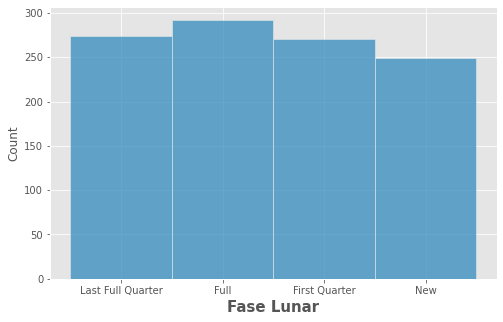

In [35]:
style.use('ggplot')
fig, ax = plt.subplots(1,figsize=(8,5))
plt.xlabel('Fase Lunar', fontsize = 15, weight = 'bold')
az = sns.histplot(dados_para_correlacaoy, x= 'lunar_phase', discrete = True)
fig.savefig('faselunar fatal sim.png', dpi =150)

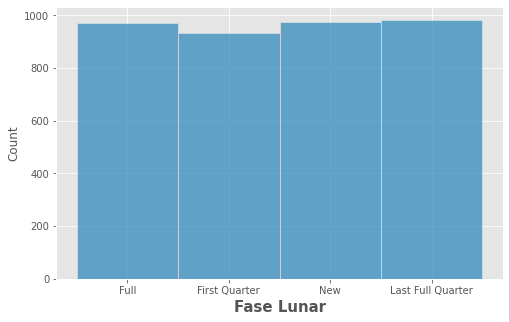

In [36]:
style.use('ggplot')
fig, ax = plt.subplots(1,figsize=(8,5))
plt.xlabel('Fase Lunar', fontsize = 15, weight = 'bold')
aj = sns.histplot(dados_para_correlacaon, x= 'lunar_phase')
fig.savefig('faselunar fatal nao.png', dpi =150)




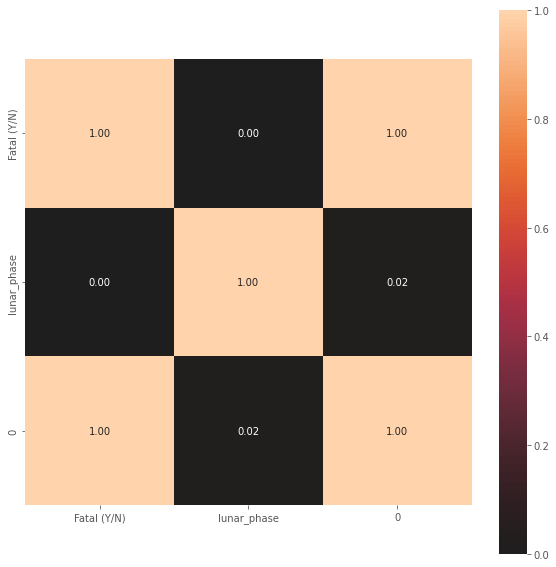

In [37]:
fig, heat_map = plt.subplots(1,figsize=(10,10))
heat_map =  associations(dados_lunar, ax = heat_map)
fig.savefig('heat map.png', dpi = 150)

In [38]:
# verificamos que a correlação detectada tende a zero sendo muito fraca, assim não temos coorelação entre a fase da lua e a incidência de ataques tão bem como na quantidade de ataques.

In [39]:
dados_lunar.head(20)

,Fatal (Y/N),lunar_phase,0
0,N,Last Full Quarter,983
1,N,New,974
2,N,Full,973
3,N,First Quarter,933
4,Y,Full,292
5,Y,Last Full Quarter,274
6,Y,First Quarter,271
7,Y,New,249
8,UNKNOWN,New,20
9,UNKNOWN,First Quarter,17


In [40]:
dados_lunar.to_csv('dados_lunar.csv')

In [41]:
dados.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,lunar_phase
0,ND.006302,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,Full
1,ND.006301,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,First Quarter
2,ND.006300,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,New
3,ND.006299,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,New
4,ND.006298,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,Last Full Quarter


In [42]:
dados.to_csv('dados_limpos.csv')

In [43]:
dados.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,lunar_phase
0,ND.006302,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,Full
1,ND.006301,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,First Quarter
2,ND.006300,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,New
3,ND.006299,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,New
4,ND.006298,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,Last Full Quarter
5,ND.006297,2018-06-03,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6298.0,Last Full Quarter
6,ND.006296,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6297.0,Last Full Quarter
7,ND.006295,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6296.0,Full
8,ND.006294,2018-05-26,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6295.0,Full
9,ND.006293,2018-05-26,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6294.0,Full
